# Import

In [1]:
from datetime import date, datetime, timedelta
# import pandas as pd
import numpy as np
import glob
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import datetime
# sys.path.insert(0, "../tools")
from covid19model.data.mobility import * # contains all necessary functions
from covid19model.visualization.output import *
from covid19model.data.sciensano import get_sciensano_COVID19_data_spatial

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
# Import Sciensano data
sciensano_df = get_sciensano_COVID19_data_spatial(agg='arr', values='hospitalised_IN', moving_avg=True).sum(axis=1)
sciensano_values= sciensano_df.values
sciensano_dates = sciensano_df.index + pd.Timedelta(hours=12)

In [3]:
# Load packages and define some correlation functions from one of the Python tools. 
#%run ../tools/correlation_functions_copyMR.py
# %run ../tools/correlation_functions_MR-GM.py

# Data analysis package, numerical package, plotting package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Use datetime format in indices
import datetime


# Fancy plot environment

<IPython.core.display.Javascript object>


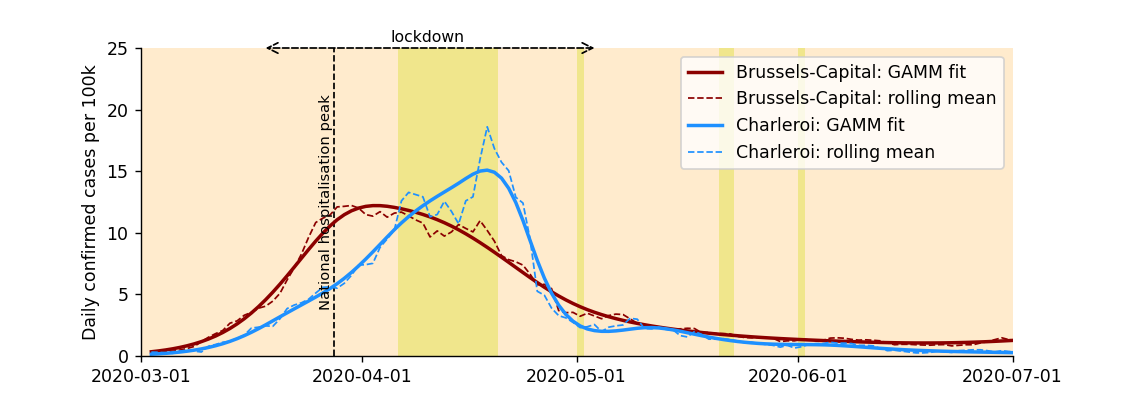

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


Text(2020-03-26 00:00:00, 4, 'National hospitalisation peak')

In [58]:
# start_date = datetime.datetime(2020, 1, 1, 0, 0)
# # end_date = datetime.datetime(2021, 9, 1, 0, 0)
# end_date = datetime.datetime(2021, 2, 1, 0, 0)
# start_calibration_wave1 = pd.Timestamp(2020, 3, 5, 0, 0)
# end_calibration_wave1 = pd.Timestamp(2020, 8, 7, 0, 0)
# start_calibration_wave2 = pd.Timestamp(2020, 9, 1, 0, 0)
# end_calibration_wave2 = pd.Timestamp(2021, 2, 1, 0, 0)

# fig, ax = plt.subplots(figsize=(9,3))
# ax.grid(False)
# ax.set_xlim(start_date, end_date)
# ymin, ymax = (0, 400000000/60/60)
# ax.set_ylim(ymin, ymax)
# color_timeframes(start_date, end_date, ax=ax)
# # ax.set_title('test', size=14)

# # Add shading denoting calibration periods
# arrows = False
# if arrows:
#     label_cal_size = 9
#     label_cal_move_up = (ymax-ymin)*0.015
#     arrow_height = ymax
#     ax.annotate(s='', xy=(start_calibration_wave1,arrow_height), xytext=(end_calibration_wave1,arrow_height), \
#                 arrowprops=dict(arrowstyle='<->'))
#     label_cal1_move_right = 44 # days
#     ax.text(start_calibration_wave1 + pd.Timedelta(days=label_cal1_move_right), \
#             ymax + label_cal_move_up, 'calibration wave 1', size=label_cal_size)

#     ax.annotate(s='', xy=(start_calibration_wave2,arrow_height), xytext=(end_calibration_wave2,arrow_height), \
#                 arrowprops=dict(arrowstyle='<->'))
#     label_cal2_move_right = 41 # days
#     ax.text(start_calibration_wave2 + pd.Timedelta(days=label_cal2_move_right), \
#             ymax + label_cal_move_up, 'calibration wave 2', size=label_cal_size)

# ticklabelsize = 12
# plt.setp(ax.get_xticklabels(), Fontsize=ticklabelsize)
# plt.setp(ax.get_yticklabels(), Fontsize=ticklabelsize)

# plt.xticks(rotation=20)

############################
# Copied from timeline.pdf #
############################

show_lockdown = True
show_waves = False
show_asc_desc = True

t1 = pd.Timestamp(2020, 1, 10, 0, 0) # First death in China
t1_name = 'First death reported by Chinese officials'
t2 = pd.Timestamp(2020, 2, 3, 0, 0) # First case in BE
t2_name = 'First clinically diagnosed case in Belgium'
t3 = pd.Timestamp(2020, 3, 10, 0, 0) # First death in BE. Two more follow day after.
t3_name = 'First death in Belgium'
t4 = pd.Timestamp(2020, 3, 18, 0, 0) # Begin lockdown
t4_name = 'Begin first Belgian lockdown'
t5 = pd.Timestamp(2020, 5, 4, 0, 0) #
t5_name = 'Lockdown exit: phase 1'
t6 = pd.Timestamp(2020, 5, 19, 0, 0) #
t6_name = 'Lockdown exit: phase 2'
t7 = pd.Timestamp(2020, 6, 4, 0, 0) #
t7_name = 'Lockdown exit: phase 3'
t8 = pd.Timestamp(2020, 7, 1, 0, 0)
t8_name = 'Start of Summer holidays'
t9 = pd.Timestamp(2020, 8, 1, 0, 0)
t9_name = 'Lockdown in Antwerp province'
t9p1 = pd.Timestamp(2020, 9, 1, 0, 0)
t9p1_name = 'Re-opening primary/secondary schools'
t10 = pd.Timestamp(2020, 10, 19, 0, 0)
t10_name = 'Begin second Belgian lockdown'
t11 = pd.Timestamp(2020, 11, 16, 0, 0)
t11_name = 'Re-opening primary/secondary schools'
t12 = pd.Timestamp(2020, 12, 19, 0, 0)
t12_name = 'Start of Winter holidays'
t13 = pd.Timestamp(2021, 1, 4, 0, 0)
t13_name = 'Re-opening primary/secondary schools'

tm1 = pd.Timestamp(2020, 3, 28, 0, 0)
tm1_name = 'National hospitalisation peak'

tm2 = pd.Timestamp(2020, 10, 30, 0, 0)
tm2_name = 'National hospitalisation peak'

start_date = datetime.datetime(2020, 3, 1, 0, 0)
end_date = datetime.datetime(2020, 7, 1, 0, 0)
fig, ax = plt.subplots(figsize=(9,3.2))
ax.grid(False)
ticklabelsize = 10
ax.set_xlim(start_date, end_date)
ax.set_xticks([start_date, datetime.datetime(2020, 4, 1, 0, 0), datetime.datetime(2020, 5, 1, 0, 0), datetime.datetime(2020, 6, 1, 0, 0), end_date])
ylim=25
ax.set_ylim(0, ylim)
# plt.ticklabel_format(axis="y", style="sci", scilimits=(4,4))
# Overlay hospitalisations
ax.grid(False)
ax.set_ylabel('Daily confirmed cases per 100k', size=ticklabelsize)
plt.setp(ax.get_xticklabels(), Fontsize=ticklabelsize)
# ax.plot(sciensano_dates, sciensano_values, linewidth=2, color='maroon', alpha=0.7)
plt.setp(ax.get_yticklabels(), Fontsize=ticklabelsize)

week_color='blanchedalmond'#'white'
weekend_color='blanchedalmond'#'lightgrey'
vacation_color='khaki'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)
# ax.set_title('test', size=14)

# Add arrows denoting lockdown periods
if show_lockdown:
    label_lockdown_size = 9
    label_lockdown_move_up = 0.5 # 20
    arrow_height = ylim
    # First lockdown
    # ax.annotate(text='', xy=(t4, arrow_height), xytext=(t5,arrow_height), \
    #             arrowprops=dict(arrowstyle='<->', ls='dashed'))
    label_lockdown1_move_right = 18 # days
    ax.text(t4 + pd.Timedelta(days=label_lockdown1_move_right), \
            ylim + label_lockdown_move_up, 'lockdown', size=label_lockdown_size)
    ax.annotate(text='', xy=(t4, arrow_height), xytext=(t5,arrow_height), \
                arrowprops=dict(arrowstyle='<->', ls='dashed'))
    # second lockdown
    # label_lockdown1_move_right = -2.5 # days
    # ax.text(t10 + pd.Timedelta(days=label_lockdown1_move_right), \
    #         ylim + label_lockdown_move_up, 'lockdown', size=label_lockdown_size)
    # ax.annotate(text='', xy=(t10, arrow_height), xytext=(t11,arrow_height), \
    #             arrowprops=dict(arrowstyle='<->', ls='dashed'))

# ax.annotate(text='', xy=(start_calibration_wave2,arrow_height), xytext=(end_calibration_wave2,arrow_height), \
#             arrowprops=dict(arrowstyle='<->'))
# label_cal2_move_right = 41 # days
# ax.text(start_calibration_wave2 + pd.Timedelta(days=label_cal2_move_right), \
#         ymax + label_cal_move_up, 'calibration wave 2', size=label_cal_size)

if show_waves:
    ti_wave1 = pd.Timestamp(2020, 3, 1, 0, 0)
    tm_wave1 = pd.Timestamp(2020, 3, 28, 0, 0)
    tf_wave1 = pd.Timestamp(2020, 7, 1, 0, 0)
    ti_wave2 = pd.Timestamp(2020, 9, 1, 0, 0)
    tm_wave2 = pd.Timestamp(2020, 10, 30, 0, 0)
    tf_wave2 = pd.Timestamp(2021, 1, 1, 0, 0)
    label_waves_size = 9
    label_waves_move_up = 2e3
    arrow_height = ylim
    # First wave
    ax.annotate(text='', xy=(ti_wave1, arrow_height), xytext=(tf_wave1,arrow_height), \
                arrowprops=dict(arrowstyle='<->'))
    label_wave1_move_right = 47 # days
    ax.text(ti_wave1 + pd.Timedelta(days=label_wave1_move_right), \
            ylim + label_waves_move_up, 'wave 1', size=label_waves_size)
    ax.annotate(text='', xy=(ti_wave1, arrow_height), xytext=(tf_wave1,arrow_height), \
                arrowprops=dict(arrowstyle='<->'))
    # second wave
    label_wave2_move_right = 45 # days
    ax.text(ti_wave2 + pd.Timedelta(days=label_wave2_move_right), \
            ylim + label_waves_move_up, 'wave 2', size=label_waves_size)
    ax.annotate(text='', xy=(ti_wave2, arrow_height), xytext=(tf_wave2,arrow_height), \
                arrowprops=dict(arrowstyle='<->'))

# Add vertically dashed lines
linestyle='--'
color='k'
linewidth=1
label_size = 8.5
label_height = 4
label_move_left = 2 #5.5 # days

# peak wave 1
ax.axvline(tm1, linestyle=linestyle, color=color, linewidth=linewidth)
ax.text(tm1-pd.Timedelta(days=label_move_left), label_height, tm1_name, rotation=90, size=label_size)

# peak wave 2
# ax.axvline(tm2, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(tm2-pd.Timedelta(days=label_move_left), label_height, tm2_name, rotation=90, size=label_size)

# ax.axvline(t2, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(t2-pd.Timedelta(days=label_move_left), label_height, t2_name, rotation=90, size=label_size)

# ax.axvline(t3, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(t3-pd.Timedelta(days=label_move_left), label_height, t3_name, rotation=90, size=label_size)

# ax.axvline(t4, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(t4-pd.Timedelta(days=label_move_left), label_height, t4_name, rotation=90, size=label_size)

# ax.axvline(t5, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(t5-pd.Timedelta(days=label_move_left), label_height, t5_name, rotation=90, size=label_size)

# ax.axvline(t6, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(t6-pd.Timedelta(days=label_move_left), label_height, t6_name, rotation=90, size=label_size)

# ax.axvline(t7, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(t7-pd.Timedelta(days=label_move_left), label_height, t7_name, rotation=90, size=label_size)

# ax.axvline(t8, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(t8-pd.Timedelta(days=label_move_left), label_height, t8_name, rotation=90, size=label_size)

# ax.axvline(t9, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(t9-pd.Timedelta(days=label_move_left), label_height, t9_name, rotation=90, size=label_size)

# ax.axvline(t9p1, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(t9p1-pd.Timedelta(days=label_move_left), label_height, t9p1_name, rotation=90, size=label_size)

# ax.axvline(t10, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(t10-pd.Timedelta(days=label_move_left), label_height, t10_name, rotation=90, size=label_size)

# ax.axvline(t11, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(t11-pd.Timedelta(days=label_move_left), label_height, t11_name, rotation=90, size=label_size)

# ax.axvline(t12, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(t12-pd.Timedelta(days=label_move_left), label_height, t12_name, rotation=90, size=label_size)

# ax.axvline(t13, linestyle=linestyle, color=color, linewidth=linewidth)
# ax.text(t13-pd.Timedelta(days=label_move_left), label_height, t13_name, rotation=90, size=label_size)

# plt.savefig('timeline_introduction_new_waves.png', dpi=400, bbox_inches='tight')

# Copied from spatial

In [4]:
#################
# CONTROL PANEL #
#################

# ---------------------------- #
# Choose time series data type #
# ---------------------------- #

data_types = ['confirmed_cases_per_100k', 'confirmed_cases',
              'hospitalised_IN_per_100k', 'hospitalised_IN',
              'deceased_hosp_per_100k', 'deceased_hosp']
data_type = data_types[0]

# ------------------------------- #
# Choose geographical aggregation #
# ------------------------------- #

agg_types = ['Postcode', 'mun', 'arr', 'prov']
agg_type = agg_types[2]

# -------------------------- #
# Take a subset of the dates #
# -------------------------- #

first_date = '2020-03-02'
last_date = '2020-07-01' # including this date
timestamp = first_date[5:] + '_' + last_date[5:]

# Time interval for GAMs should awalys correspond to the entire wave, since the GAM fitting is performed for the 
# whole wave to avoid edge effects around the peak. Therefore, one should always run the Rscript 
# ../rfiles/fitGams.R for the entire wave. In this notebook, in order to perform the time series analysis,
# the GAM data is cropped according to the period defined by timestamp, which can correpond to the increasing or 
# decreasing parts of the epidemic curve
first_dateGAM = '2020-03-02'
last_dateGAM = '2020-07-01'
timestampGAM = first_dateGAM[5:] + '_' + last_dateGAM[5:]

def print_choices():
    print(40*'=')
    print('Control panel choices:')
    print(40*'=')
    print('data_type: ' + data_type)
    print('agg_type: ' + agg_type)
    print('timestamp: ' + timestamp)
    print('timestampGAM: ' + timestampGAM)
    print(40*'=')

print_choices()

Control panel choices:
data_type: confirmed_cases_per_100k
agg_type: arr
timestamp: 03-02_07-01
timestampGAM: 03-02_07-01


In [5]:
# Load and show all data
data_file = '../../../COVID19_spatial_private/interim/all_nonpublic_timeseries_' + agg_type + '.csv'
#data_folder = '../interim/GAM_fitting_' + agg_type + '/'

# Load and copy the data file
raw_data = pd.read_csv(data_file, sep=',', header=0,  parse_dates = ['DATE'])
raw_data.fillna(0, inplace=True)
data = raw_data.copy()
# Table for inhabitants per geographical aggregate
inhab = data.pivot_table(index='name', values='inhabitants', aggfunc='first')
inhab.loc[:,'inhabitants'] = inhab.loc[:,'inhabitants'].astype(int)

# Pivot the table such that we have all geographical regions in the columns, all the dates in the indices and all the values
# (such as confimer per 100k) in the boxes
if agg_type == 'Postcode':
    data = data.pivot_table(index='DATE', columns='Postcode', values=data_type)
    data.fillna(0, inplace=True)
else:
    data = data.pivot_table(index='DATE', columns='name', values=data_type)
    data.fillna(0, inplace=True)
    
# Average out over 7 days in a rolling window
window = '7D'
win_type = None
#win_type = 'triang'
data_daily = data.copy()
data = data.rolling(window=window, win_type=win_type, closed='left', min_periods=1).mean().shift(-84, freq='h')

# Select subset of dates
data_temp = data.loc[first_dateGAM : last_dateGAM] # crop index according to the timestamp for GAMs
GAM_index = data_temp.index

data = data.loc[first_date : last_date] # crop index according to the timestamp
data_daily = data_daily.loc[first_date : last_date]

print_choices()
data_daily.head()

Control panel choices:
data_type: confirmed_cases_per_100k
agg_type: arr
timestamp: 03-02_07-01
timestampGAM: 03-02_07-01


name,Arrondissement Aalst,Arrondissement Aarlen,Arrondissement Aat,Arrondissement Antwerpen,Arrondissement Bastenaken,Arrondissement Bergen,Arrondissement Borgworm,Arrondissement Brugge,Arrondissement Brussel-Hoofdstad,Arrondissement Charleroi,...,Arrondissement Roeselare,Arrondissement Sint-Niklaas,Arrondissement Thuin,Arrondissement Tielt,Arrondissement Tongeren,Arrondissement Turnhout,Arrondissement Verviers,Arrondissement Veurne,Arrondissement Virton,Arrondissement Zinnik
DATE,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0.340541,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.328338,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2020-03-03,0.000000,0.0,0.778404,0.378166,0.0,0.000000,0.000000,0.707351,0.164169,0.000000,...,0.000000,0.000000,0.0,2.140686,0.487941,0.215114,0.346889,0.0,0.0,0.0
2020-03-04,0.340541,0.0,0.000000,0.283625,0.0,0.000000,0.000000,0.353676,0.410423,0.503827,...,0.000000,0.392388,0.0,0.000000,0.487941,0.430229,0.693777,0.0,0.0,0.0
2020-03-05,0.681083,0.0,0.000000,0.472708,0.0,0.385747,0.000000,1.768378,0.164169,0.755740,...,0.000000,0.392388,0.0,0.000000,2.439703,0.430229,0.693777,0.0,0.0,0.0
2020-03-06,0.340541,0.0,0.000000,0.283625,0.0,0.000000,1.221165,1.061027,0.738762,0.251913,...,0.647274,1.177163,0.0,1.070343,3.415584,0.645343,0.693777,0.0,0.0,0.0


In [6]:
# Load and show all data
GAM_path = ''

if agg_type == 'arr':
    GAM_path = '../../../COVID19_spatial_private/interim/GAM_fitting/GAM_fitting_' + timestampGAM + '_arr_' + data_type + '/'
if agg_type == 'prov':
    GAM_path = '../../../COVID19_spatial_private/interim/GAM_fitting/GAM_fitting_' + timestampGAM + '_prov_' + data_type + '/'
    
# get list of csv files for each aggregation type
gam_files = [fn for fn in os.listdir(GAM_path) if fn.endswith('.csv',)]
gam_files.remove('SplineCoefs.csv') # ignore SplineCoefs.csv

# create GAM dataframe
dfGAM = pd.DataFrame(columns=data.columns, index=GAM_index)
#print(data.columns)

# load NIS/name dictionary
if agg_type == 'arr':
    NISdf = pd.read_csv("../../../COVID19_spatial_private/data/NIS_arrondissement.csv")
    NISdf.rename(columns = { 'Arrondissement' : agg_type }, inplace=True)
elif agg_type == 'prov':
    NISdf = pd.read_csv("../../../COVID19_spatial_private/data/NIS_province.csv")
    NISdf.rename(columns = { 'Province' : agg_type }, inplace=True)
    
# Add a line for Brussels in the NISdf 
if agg_type == 'prov':
    brussel = pd.DataFrame([['21000', 'Brussel-Hoofdstad']], columns=['NIS', 'prov'])
    NISdf = pd.concat([brussel,NISdf], ignore_index=True)
    
NISdf_sorted = NISdf.sort_values('arr').reset_index()
    
# fill dfGAM with time series from GAM prediction
for count in range(len(gam_files)):
    nis = gam_files[count].replace('_gamfit.csv', '').replace('NIS',' ')
    nis = str(NISdf_sorted.iloc[count].NIS)
    if agg_type == 'arr':
        col = 'Arrondissement ' + NISdf.query('NIS == ' + nis)[agg_type].values[0]
    elif agg_type == 'prov':
        if nis == ' 21000':
            col = 'Arrondissement Brussel-Hoofdstad'
        else:
            col = 'Provincie ' + NISdf.query('NIS == ' + nis)[agg_type].values[0]
        
    gam_data = pd.read_csv(GAM_path + gam_files[count])
    aux = gam_data.to_numpy()
    dfGAM[col] = aux[:,2] # GAM predictions are in the third column of each GAM file

dfGAM.fillna(0, inplace=True)
#print(dfGAM)

dfGAM = dfGAM.loc[first_dateGAM : last_dateGAM]

print_choices()
# dfGAM.head()
dfGAM

Control panel choices:
data_type: confirmed_cases_per_100k
agg_type: arr
timestamp: 03-02_07-01
timestampGAM: 03-02_07-01


name,Arrondissement Aalst,Arrondissement Aarlen,Arrondissement Aat,Arrondissement Antwerpen,Arrondissement Bastenaken,Arrondissement Bergen,Arrondissement Borgworm,Arrondissement Brugge,Arrondissement Brussel-Hoofdstad,Arrondissement Charleroi,...,Arrondissement Roeselare,Arrondissement Sint-Niklaas,Arrondissement Thuin,Arrondissement Tielt,Arrondissement Tongeren,Arrondissement Turnhout,Arrondissement Verviers,Arrondissement Veurne,Arrondissement Virton,Arrondissement Zinnik
DATE,,,,,,,,,,,,,,,,,,,,,
2020-03-02 12:00:00,0.330825,0.168668,0.062559,0.277233,0.108385,0.010099,0.082528,0.543520,0.344650,0.144420,...,0.187312,0.220142,0.021332,0.337791,0.635237,0.238627,0.642141,0.230668,0.011792,0.006330
2020-03-03 12:00:00,0.387837,0.208084,0.079761,0.327016,0.138533,0.023284,0.098093,0.619040,0.411517,0.176756,...,0.232518,0.264753,0.029224,0.407316,0.741054,0.285596,0.724210,0.271337,0.016411,0.010050
2020-03-04 12:00:00,0.454591,0.256609,0.101762,0.385594,0.176991,0.052910,0.116738,0.704953,0.491090,0.216135,...,0.288456,0.318267,0.040011,0.491192,0.864375,0.341713,0.816549,0.319068,0.022826,0.015926
2020-03-05 12:00:00,0.532682,0.316250,0.129909,0.454399,0.225966,0.117172,0.139433,0.802609,0.585551,0.263945,...,0.357531,0.382365,0.054728,0.592343,1.007996,0.408678,0.920303,0.374992,0.031720,0.025150
2020-03-06 12:00:00,0.623941,0.389420,0.165930,0.535053,0.288208,0.250024,0.167546,0.913509,0.697372,0.321792,...,0.442632,0.459005,0.074762,0.714274,1.175132,0.488481,1.036710,0.440394,0.044023,0.039519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27 12:00:00,0.327260,1.058340,0.549723,1.303248,1.284804,0.610517,0.363515,1.125556,1.164943,0.308926,...,1.453388,0.829836,0.559216,0.584791,1.043795,0.504174,0.436615,0.224457,0.028856,0.312079
2020-06-28 12:00:00,0.322233,1.136976,0.587147,1.345643,1.183116,0.700197,0.373606,1.132592,1.190809,0.298254,...,1.468592,0.871275,0.563569,0.565445,0.995813,0.484193,0.424924,0.219817,0.025991,0.251306
2020-06-29 12:00:00,0.317316,1.221908,0.627504,1.391055,1.086911,0.812181,0.386663,1.140106,1.218950,0.287705,...,1.482493,0.917090,0.567321,0.546820,0.949899,0.464780,0.413497,0.215348,0.023389,0.201037


In [59]:
aggname1, color1 = 'Arrondissement Brussel-Hoofdstad', 'darkred'
aggname2, color2 = 'Arrondissement Charleroi', 'dodgerblue'

time_series1 = data[[aggname1]].loc[first_dateGAM : last_dateGAM]
time_series1_daily = data_daily[[aggname1]].loc[first_dateGAM : last_dateGAM]
time_series2 = data[[aggname2]].loc[first_dateGAM : last_dateGAM]
time_series2_daily = data_daily[[aggname2]].loc[first_dateGAM : last_dateGAM]

time_seriesGAM1 = dfGAM[aggname1]
time_seriesGAM2 = dfGAM[aggname2]

In [60]:
# Plot first time series
ax.plot(time_seriesGAM1, color=color1, linewidth=2, label = 'Brussels-Capital: GAMM fit')
ax.plot(time_series1, color=color1, alpha=1, linewidth=1, linestyle='dashed', label = 'Brussels-Capital: rolling mean')
# ax.plot(time_series1_daily, color=color1, alpha=0.3, linewidth=1, label = aggname1 + ' raw data')

# Overplot second time series
ax.plot(time_seriesGAM2, color=color2, linewidth=2, label ='Charleroi: GAMM fit')
ax.plot(time_series2, color=color2, alpha=1, linewidth=1, linestyle='dashed', label ='Charleroi: rolling mean')
# ax.plot(time_series2_daily, color=color2, alpha=0.3, linewidth=1, label = aggname2 + ' raw data')

plt.legend(fontsize=10, loc='upper right')

plt.savefig('GAMM-fit-21000-52000_wave1.png', dpi=400, bbox_inches='tight')